In [2]:
import numpy as np
from netCDF4 import Dataset
from py_wake.site.shear import PowerShear
import xarray as xr
import netCDF4
from datetime import datetime
import matplotlib.pyplot as plt
from py_wake.site import UniformSite
from py_wake.examples.data.iea37 import IEA37_WindTurbines
from py_wake.site import XRSite

In [8]:
Site_data = np.load('siteData.npz')
ws=Site_data['arr2']
wd=Site_data['arr3']

Define XRsite

In [10]:
# Define bins for wind speed and direction
wind_speed_bins = np.linspace(0, 30.5, 61, endpoint=False)  # Bins from 0 to 30 m/s
wind_direction_bins = np.linspace(0, 370,37,endpoint=False)  # Bins every 10 degrees

# Digitize the wind data into these bins
ws_indices = np.digitize(ws, wind_speed_bins)
wd_indices = np.digitize(wd, wind_direction_bins)

# Create a 2D histogram to count occurrences
hist, ws_edges, wd_edges = np.histogram2d(ws, wd, bins=[wind_speed_bins, wind_direction_bins])
# Normalize the histogram to get probabilities
probabilities = hist / hist.sum()

# Create xarray DataArray for probabilities
#P = xr.DataArray(probabilities, coords=[('ws', wind_speed_bins[:]), ('wd', wind_direction_bins[:])])

# Define turbulence intensity (TI)
ti = 0.1

# Create the dataset for XRSite
site_ds = xr.Dataset(
    data_vars={
        'P': (('ws', 'wd'), probabilities),
     #   'TI': (('ws', 'wd'), np.full(probabilities.shape, ti))
    },
    coords={
        'ws': wind_speed_bins[:-1],
        'wd': wind_direction_bins[:-1]
    }
)

site = XRSite(
    ds=site_ds,
   # shear=PowerShear(h_ref=10, alpha=0.2)
)

In [48]:
lw = site.local_wind([0], [0], h=50)

ValueError: Lengths of x does not match shape of V

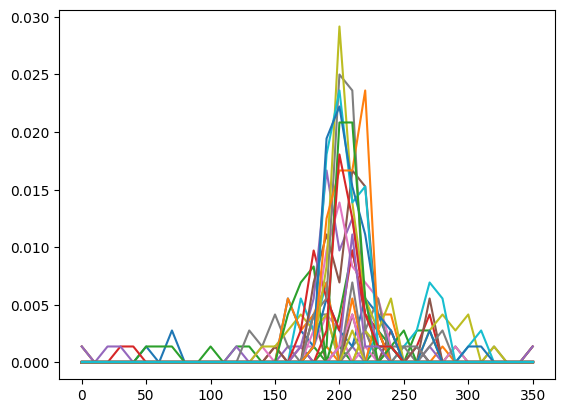

In [11]:
plt.plot(wind_direction_bins[:-1], probabilities.T)

In [38]:
_ = site.plot_wd_distribution(wind_direction_bins=36,ws_bins=wind_speed_bins)

TypeError: plot_wd_distribution() got an unexpected keyword argument 'wind_direction_bins'

In [ ]:
_ = site.plot_ws_distribution(wd=[0,90,180,270])

In [31]:
probabilities.shape

(60, 36)

In [33]:
wind_direction_bins.shape

(37,)

In [36]:
wind_speed_bins

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. ])

In [39]:
probabilities

array([[0.00138889, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00138889, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00138889],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])